<a href="https://colab.research.google.com/github/QuynhNg30/Q/blob/main/Quynh_Nguyen's_Hotel_booking_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: ỨNG DỤNG BIG DATA ĐỂ DỰ ĐOÁN HỦY PHÒNG KHÁCH SẠN**

link colab: https://colab.research.google.com/drive/1Zr6XEmunDZK94jC3IG4krP_-UaCG1k2V#scrollTo=pAvxMmJlLaLM

link data: https://drive.google.com/file/d/10qTJ_TwsSTnEuJ6cBT3hArvPDMzYq9MJ/view?usp=drive_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install matplotlib-venn
# Setup

# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

try:
    # Code có thể gây ra lỗi
    import eli5 # Feature importance evaluation
except Exception as e:
    # Xử lý lỗi, in ra lỗi nhưng không dừng chương trình
    print(f"Đã xảy ra lỗi: {e}")
# Các dòng lệnh tiếp theo vẫn chạy bình thường
print("Code tiếp tục chạy sau khi gặp lỗi.")

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

#get data from drie
file_path = '/content/drive/My Drive/BIG DATA/hotel_booking.csv'
df = pd.read_csv(file_path)

Đã xảy ra lỗi: No module named 'eli5'
Code tiếp tục chạy sau khi gặp lỗi.


In [ ]:
#UNDERSTANDING THE DATA
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Thông tin về dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Làm sạch dữ liệu

In [ ]:
# Kiểm tra các giá trị bị thiếu
df.isna().sum()
null_series = df.isnull().sum()
print(null_series[null_series > 0])

children         4
country        488
agent        16340
company     112593
dtype: int64


In [ ]:
#"NULL" trong trường  Agent và Company không được coi là giá trị bị thiếu mà biểu thị rằng lần đặt không đặt qua bất kỳ đại lý, và công ty nào.
# Vì vậy thay thế tất cả các giá trị NULL trong cột agent và company bằng giá trị 999.
# Việc sử dụng một giá trị đặc biệt như 999 cho phép mô hình biết rằng không có đại lý nào tham gia vào các lần đặt phòng này.
df.loc[df.agent.isnull(), 'agent'] = 999
df.loc[df.company.isnull(), 'company'] = 999

In [ ]:
#Xóa giá trị NULL cột Children vì số lượng rất nhỏ (4 dòng bị thiếu)
df.dropna(subset=['children'], inplace=True)

In [ ]:
# Thay thế giá trị null cột contry thành "unknown"
df['country'].fillna("unknown", inplace=True)

<ipython-input-31-7ad0678cd2c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("unknown", inplace=True)


In [ ]:
# Kiểm tra lại còn missing value không :
df.isnull().sum().sum()

0

In [ ]:
# Thay đổi kiểu dữ liệu của cột children từ float sang integer:
df['children'] = df['children'].astype(int)

# Thay đổi kiểu dữ liệu của cột reservation status date thành datetime:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
#Kiểm các hàng trùng lập
df[df.duplicated(keep='first')]
# Tập dữ liệu chứa các hàng bị trung lập, tuy nhiên vì không có cột booking ID nên không chắc chắc chúng có thật sự là bị trùng hay không nên sẽ không xóa.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,999.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,999.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,999.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,999.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,999.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,999.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,999.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,999.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
# Xóa các giá trị bị lỗi
# Trường ADR đề cập đến mức giá trung bình mỗi đêm đặt phòng. Do đó, việc nó nhận giá trị nhỏ hơn 0 là không bình thường.
df = df[df.adr > 0]

In [ ]:
# Một số dòng trong dữ liệu có số lượng người lớn (adults), trẻ em (children), và em bé (babies) đều bằng 0. Điều này không hợp lý vì một lần đặt phòng không thể có số người bằng 0
df[df['adults']+df['babies']+df['children'] == 0].shape

(31, 32)

In [ ]:
# Loại bỏ những dòng không hợp lệ đó
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,999.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,999.0,999.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,999.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,999.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,999.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,999.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Thông tin về dataset sau làm sạch
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117426 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117426 non-null  object        
 1   is_canceled                     117426 non-null  int64         
 2   lead_time                       117426 non-null  int64         
 3   arrival_date_year               117426 non-null  int64         
 4   arrival_date_month              117426 non-null  object        
 5   arrival_date_week_number        117426 non-null  int64         
 6   arrival_date_day_of_month       117426 non-null  int64         
 7   stays_in_weekend_nights         117426 non-null  int64         
 8   stays_in_week_nights            117426 non-null  int64         
 9   adults                          117426 non-null  int64         
 10  children                        117426 non-null  int64       

In [ ]:
#Mã hóa và chuẩn hóa dữ liệu

In [ ]:
#Copy dataframe vào một cái mới
hotel_eng = pd.DataFrame()
hotel_eng = df.copy()

In [ ]:
# Trước tiên, cách chuyển cột month thành cột số, đổi tên của các tháng thành tháng số
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

hotel_eng['arrival_date_month'] = hotel_eng['arrival_date_month'].map(month_to_number)

#Kết hợp ba cột ngày tháng thành một cột duy nhất
hotel_eng['arrival_date'] = pd.to_datetime(hotel_eng['arrival_date_year'].astype(str) + '-' +
                                    hotel_eng['arrival_date_month'].astype(str) + '-' +
                                    hotel_eng['arrival_date_day_of_month'].astype(str))

In [ ]:
# Hiện tại, dư thừa cột arrival_date_week_number, nên bỏ cột  (tương quan mạnh, không tốt cho đầu vào mô hình ML)
hotel_eng.drop(columns=['arrival_date_week_number'], inplace= True )

In [ ]:
#Không nên sử dụng các cột booking_status và booking_status_date để dự đoán liệu lượt đặt chỗ có bị hủy hay không vì các cột này chứa thông tin trực tiếp về biến phụ thuộc. Việc sử dụng cột này để đưa ra dự đoán sẽ dẫn đến rò rỉ dữ liệu lớn.
#Vì lý do đó các cột đó sẽ bị loại bỏ.
hotel_eng.drop(columns=['reservation_status','reservation_status_date'], inplace= True )

In [ ]:
# Country có 177 giá trị khác nhau, với phần lớn là PRT (Bồ Đào Nha). Có nghĩa là bộ mã hóa sẽ có một lượng lớn cột mà không đưa ra thông tin liên quan cho mô hình.
# Loại bỏ cột này
hotel_eng.drop(columns=['country'], inplace=True)

In [ ]:
df.groupby(df['deposit_type']).describe(include='all')


hotel                                                       \
               count unique           top   freq mean  min  25%  50%  75%   
deposit_type                                                                
No Deposit    102677      2    City Hotel  65230  NaN  NaN  NaN  NaN  NaN   
Non Refund     14587      2    City Hotel  12868  NaN  NaN  NaN  NaN  NaN   
Refundable       162      2  Resort Hotel    142  NaN  NaN  NaN  NaN  NaN   

                       is_canceled                                      ...  \
              max  std       count unique top freq      mean  min  25%  ...   
deposit_type                                                            ...   
No Deposit    NaN  NaN    102677.0    NaN NaN  NaN  0.287085  0.0  0.0  ...   
Non Refund    NaN  NaN     14587.0    NaN NaN  NaN  0.993624  0.0  1.0  ...   
Refundable    NaN  NaN       162.0    NaN NaN  NaN  0.222222  0.0  0.0  ...   

             reservation_status                                \
                           mean  min  25%  50%  75%  max  std   
deposit_type                                                    
No Deposit                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Non Refund                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Refundable                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

             reservation_status_date                   \
                               count unique  top freq   
deposit_type                                            
No Deposit                    102677    NaN  NaN  NaN   
Non Refund                     14587    NaN  NaN  NaN   
Refundable                       162    NaN  NaN  NaN   

                                                                  \
                                       mean                  min   
deposit_type                                                       
No Deposit    2016-08-20 18:22:29.092785920  2014-10-17 00:00:00   
Non Refund    2016-03-05 01:07:19.542057984  2015-01-01 00:00:00   
Refundable    2016-07-06 08:08:53.333333248  2015-09-06 00:00:00   

                                                                             \
                              25%                  50%                  75%   
deposit_type                                                                  
No Deposit    2016-03-06 00:00:00  2016-08-30 00:00:00  2017-02-28 00:00:00   
Non Refund    2015-10-21 00:00:00  2016-01-18 00:00:00  2016-11-21 00:00:00   
Refundable    2016-04-03 00:00:00  2016-04-04 00:00:00  2016-10-01 12:00:00   

                                        
                              max  std  
deposit_type                            
No Deposit    2017-09-14 00:00:00  NaN  
Non Refund    2017-08-10 00:00:00  NaN  
Refundable    2017-08-26 00:00:00  NaN  

[3 rows x 341 columns]

# Chuẩn đoán

<Axes: >

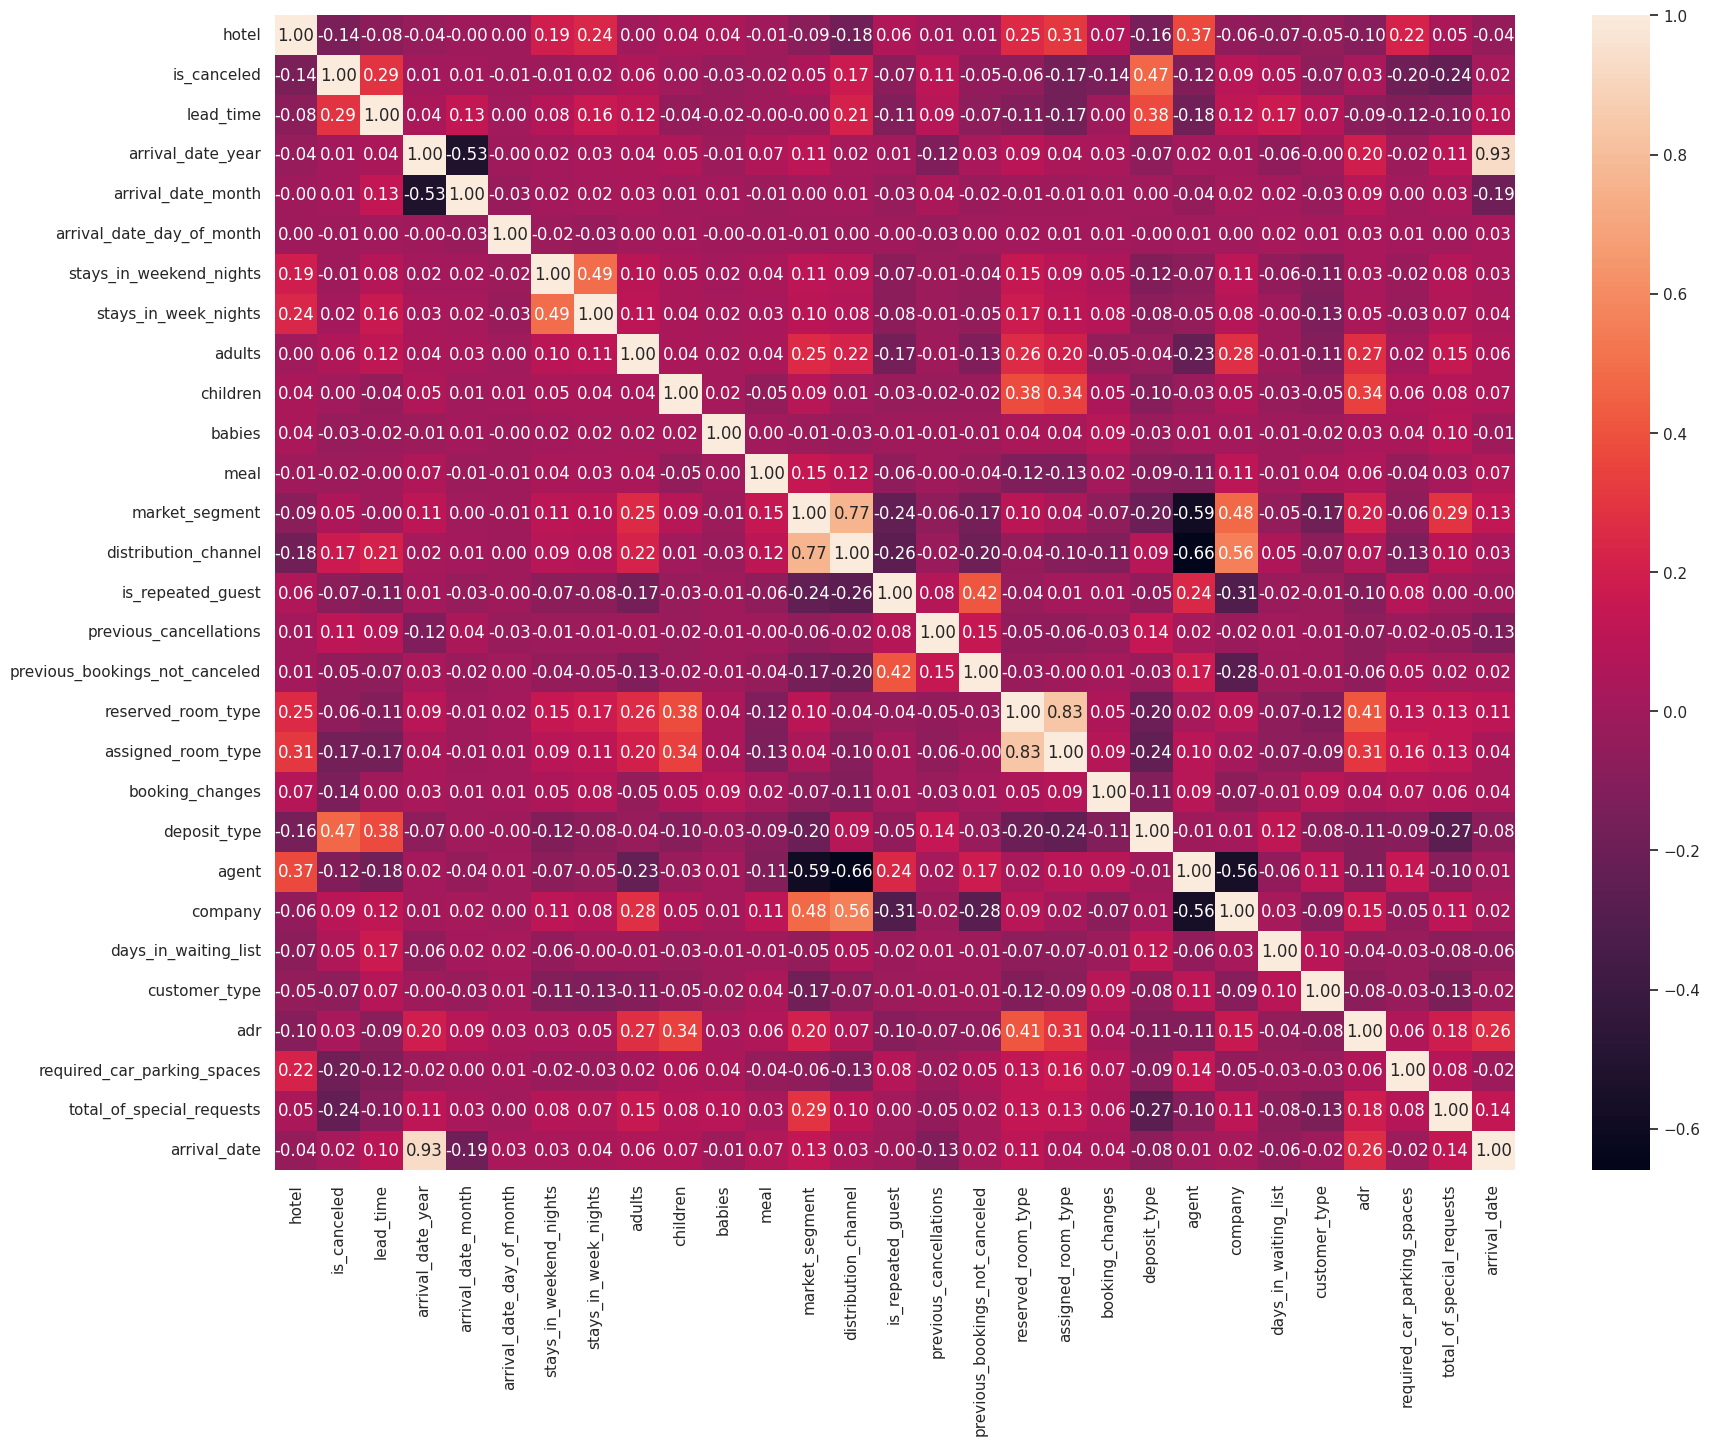

In [ ]:
#Mã hóa nhãn đề cập đến việc chuyển đổi các nhãn thành dạng số để chuyển chúng thành dạng có thể đọc được bằng máy
df_le = hotel_eng.copy()
le = LabelEncoder()
categoricals = [
    'meal',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'hotel'
]
for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])
# Vẽ heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f')

Từ biểu đồ tương quan trên, chuẩn đoán các yếu tố ảnh hưởng đến Sự hủy phòng bao gồm:
- Loại đặt cộc (deposit_type): 0,47
- Thời gian đặt trước (lead_time): 0,29
- Tổng số yêu cầu đặt biệt (total of special request): -0,24
- Số lượng chỗ để xe được yêu cầu (requried_car_parking_spaces): -0,20

In [ ]:
import scipy.stats as stats # Add this line at the beginning of your script

# Kiểm định thống kê
results = {}

# Danh sách các thuộc tính cần kiểm định (loại bỏ 'is_canceled' vì đó là biến phân nhóm)
attributes = ['lead_time', 'required_car_parking_spaces', 'total_of_special_requests']

for attribute in attributes:
    # Chia dữ liệu thành 2 nhóm: đã hủy (is_canceled = 1) và không hủy (is_canceled = 0)
    canceled_values = hotel_eng[hotel_eng['is_canceled'] == 1][attribute]
    not_canceled_values = hotel_eng[hotel_eng['is_canceled'] == 0][attribute]

    # Use stats.ttest_ind since stats is now defined
    t_stat, p_value = stats.ttest_ind(canceled_values, not_canceled_values, nan_policy='omit')

    results[attribute] = (t_stat, p_value)

# Kiểm tra deposit_type (biến phân loại) bằng Chi-squared test
deposit_type_crosstab = pd.crosstab(hotel_eng['deposit_type'], hotel_eng['is_canceled'])
chi2, p_value_chi2, _, _ = stats.chi2_contingency(deposit_type_crosstab) # Use stats.chi2_contingency
results['deposit_type'] = (chi2, p_value_chi2)

# Hiển thị kết quả
for attribute, (statistic, p_value) in results.items():
    if attribute == 'deposit_type':
        print(f'Test cho {attribute}: Chi-squared statistic = {statistic:.3f}, p-value = {p_value:.3f}')
    else:
        print(f'Test cho {attribute}: t-statistic = {statistic:.3f}, p-value = {p_value:.3f}')

Test cho lead_time: t-statistic = 104.070, p-value = 0.000
Test cho required_car_parking_spaces: t-statistic = -69.037, p-value = 0.000
Test cho total_of_special_requests: t-statistic = -83.728, p-value = 0.000
Test cho deposit_type: Chi-squared statistic = 27227.198, p-value = 0.000


Kết quả kiểm định t-test cho thấy cả 4 yếu tố là yếu tố ảnh hưởng mạnh đến sự hủy phòng

# Dự đoán

In [ ]:
# Lựa chọn các thuộc tính đưa vào mô hình

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Xác định các thuộc tính độc lập (X) và biến phụ thuộc (y)
X = df_le.drop('is_canceled', axis=1)
y = df_le['is_canceled']

X = X.select_dtypes(include=['number'])

# Chọn k thuộc tính tốt nhất dựa trên kiểm định chi-squared
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Kết hợp điểm số và tên cột
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Đặt tên cột

# Sắp xếp các thuộc tính theo điểm số giảm dần
print(featureScores.nlargest(20, 'Score'))

                             Specs         Score
1                        lead_time  1.078456e+06
20                           agent  8.189625e+05
22            days_in_waiting_list  4.599075e+04
21                         company  3.769645e+04
19                    deposit_type  2.306965e+04
14          previous_cancellations  1.191507e+04
17              assigned_room_type  9.062167e+03
26       total_of_special_requests  7.260763e+03
15  previous_bookings_not_canceled  5.897374e+03
18                 booking_changes  4.560766e+03
25     required_car_parking_spaces  4.409151e+03
24                             adr  2.574143e+03
0                            hotel  1.480899e+03
16              reserved_room_type  1.324320e+03
12            distribution_channel  9.965095e+02
13               is_repeated_guest  6.345519e+02
9                           babies  1.484561e+02
11                  market_segment  9.311337e+01
23                   customer_type  8.386613e+01
10                  

In [ ]:
# Xác định các thuộc tính độc lập (X) và biến phụ thuộc (y)
X = df_le[['lead_time', 'agent', 'days_in_waiting_list', 'company', 'deposit_type']]
y = df_le['is_canceled']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=100)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values


        lead_time  agent  days_in_waiting_list  company  deposit_type
96708           1  999.0                     0    251.0             0
27139         194    6.0                     0    999.0             0
112812        246   12.0                     0    999.0             0
43899          87    1.0                     0    999.0             1
66156         236    9.0                     0    999.0             0
...           ...    ...                   ...      ...           ...
98116         276    6.0                   178    999.0             0
54647         101    9.0                     0    999.0             0
45154          40   83.0                     0    999.0             0
91794         192   34.0                     0    999.0             0
85552           9    9.0                     0    999.0             0

[23486 rows x 5 columns]
[0 0 0 ... 0 0 0]


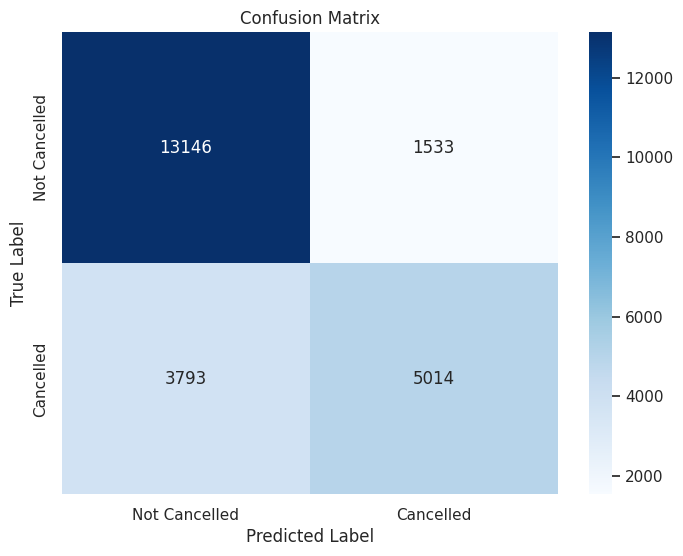

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred (predicted labels)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
print(classification_report(y_test, y_pred))
# Tính toán precision, recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

              precision    recall  f1-score   support

           0       0.78      0.90      0.83     14679
           1       0.77      0.57      0.65      8807

    accuracy                           0.77     23486
   macro avg       0.77      0.73      0.74     23486
weighted avg       0.77      0.77      0.76     23486

Precision: 0.7658469528028105
Recall: 0.5693198592029067
F1-score: 0.6531197082193565


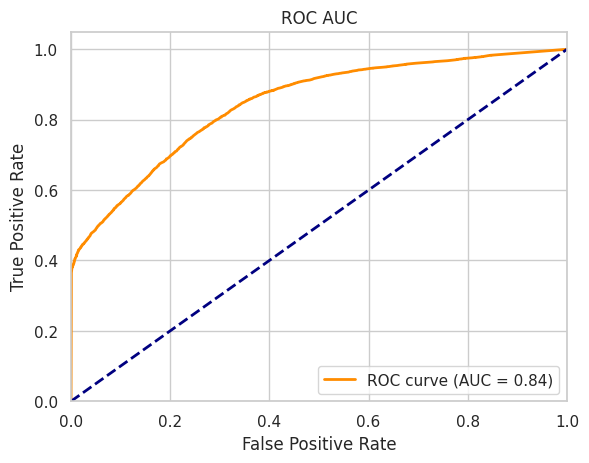

In [ ]:
from sklearn.metrics import roc_curve, auc

# Tính toán xác suất dự đoán cho các lớp
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Tính toán ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.show()